In [1]:
! pip install chromadb -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 18

In [6]:
! pip install pillow
! pip install open-clip-torch # installing the embedding model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.7 MB/s eta 0:00:00


In [2]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction # for multimodal capabilities
from chromadb.utils.data_loaders import ImageLoader


In [3]:
# create database file at folder "my_vectordb" or load into client if exists
chroma_client = chromadb.PersistentClient(path="my_vectordb")

In [7]:
# create a collection (this is a vector database)
image_loader=ImageLoader() # loads the images
multimodal_ef= OpenCLIPEmbeddingFunction() # converts the images to embeddings
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db",
                                                       embedding_function=multimodal_ef,
                                                       data_loader=image_loader)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [9]:
multimodal_db.add(
    ids=['0','1'],
    uris=['images/lion.jpg','images/tiger.jpg'],


)

In [10]:
multimodal_db.count()

2

In [14]:
# function to display the images
import matplotlib.pyplot as plt
def print_query_results(query_list:list, query_results:dict) -> None:
  result_count=len(query_results['ids'][0])

  for i in range(len(query_list)):
    print(f'Results for query: {query_list[i]}')

    for j in range(result_count):
      id = query_results["ids"][i][j]
      distance = query_results['distances'][i][j]
      data=query_results['data'][i][j]
      document=query_results['documents'][i][j]
      metadata=query_results['metadatas'][i][j]
      uri = query_results['uris'][i][j]
      print(f'id : {id}, distance : {distance} , metadata :{ metadata}, document : {document}')

      # display the physical which must first exist at URI
      print(f'data : {uri}')
      plt.imshow(data)
      plt.axis("off")
      plt.show()

Results for query: tig
id : 1, distance : 1.6131259730614282 , metadata :{'img_category': 'animals'}, document : None
data : images/tiger.jpg


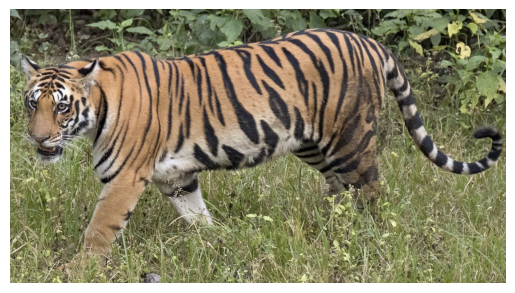

In [35]:
query_texts=["tig"]
query_results=multimodal_db.query(
    query_texts=query_texts,
    n_results=1,
    include=['documents','distances', 'metadatas','data','uris'],
    where={'img_category':'animals'}
    # you can also define not equal to using $ne where={'img_category':{'$ne':'food'}'}

)
print_query_results(query_texts,query_results)

In [18]:

query_results=multimodal_db.query(
    query_texts=["lion"],
    n_results=1,
    include=['documents','distances', 'metadatas','data','uris']
)
print(query_results)

{'ids': [['0']], 'distances': [[1.4490113895284678]], 'metadatas': [[None]], 'embeddings': None, 'documents': [[None]], 'uris': [['images/lion.jpg']], 'data': [[array([[[147, 155, 174],
        [148, 156, 175],
        [150, 157, 175],
        ...,
        [169, 176, 186],
        [167, 174, 184],
        [168, 172, 183]],

       [[148, 156, 175],
        [149, 157, 176],
        [150, 157, 175],
        ...,
        [168, 175, 185],
        [167, 174, 184],
        [168, 172, 183]],

       [[149, 158, 175],
        [150, 159, 176],
        [150, 157, 175],
        ...,
        [169, 176, 186],
        [168, 175, 185],
        [169, 173, 184]],

       ...,

       [[ 58,  50,  29],
        [ 60,  54,  30],
        [ 52,  51,  21],
        ...,
        [115,  92,  60],
        [107,  88,  56],
        [100,  83,  53]],

       [[ 66,  51,  30],
        [ 68,  57,  35],
        [ 59,  55,  28],
        ...,
        [110,  88,  51],
        [107,  89,  53],
        [ 99,  83,  49]],

 

In [21]:
# real world application
multimodal_db.add(
    ids=[
        'E23',
        'E25',
        'E33'
    ],
    uris=[
        'images/E23-2.jpg',
        'images/E25-2.jpg',
        'images/E33-2.jpg',
    ],
    metadatas=[
        {"item_id":'E23', 'item_name':'Braised Fried Tofu with Greens'},
        {"item_id":'E25','item_name':'Sauted Assorted Vegetables'},
        {"item_id":'E33','item_name':'Kung Pao Tofu'}
    ]
)

In [22]:
multimodal_db.count()

5

In [27]:
# real world application
multimodal_db.update(
    ids=[
        'E23',
        'E25',
        'E33'
    ],
    uris=[
        'images/E23-2.jpg',
        'images/E25-2.jpg',
        'images/E33-2.jpg',
    ],
    metadatas=[
        {"item_id":'E23','img_category':'food', 'item_name':'Braised Fried Tofu with Greens'},
        {"item_id":'E25', 'img_category':'food', 'item_name':'Sauted Assorted Vegetables'},
        {"item_id":'E33', 'img_category':'food', 'item_name':'Kung Pao Tofu'}
    ]
)

In [32]:
multimodal_db.update(
    ids=['0','1'],
    uris=['images/lion.jpg','images/tiger.jpg'],
    metadatas=[
        {'img_category':'animals'},
        {'img_category':'animals'}]

)